In [1]:
# Import all libraries in the top so that its easier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [104]:
# Import Genetic CSV
# TODO:: Get it from hosted site or Host the data source somewhere
geneticsDS = pd.read_csv('/Users/rajip/Documents/MIT/Maths and Stats (MDA511)/Assignment2/genetics.csv')

In [228]:
# Filter Data between age 12 to 70
geneticsDS = geneticsDS[(geneticsDS['Age'] > 12) & (geneticsDS['Age'] < 70)]
geneticsDS['Age'].min()
geneticsDS['Age'].max()
geneticsDS.index.size
geneticsDS.describe()

,Age
count,1250.000000
mean,32.044800
std,7.203076
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,65.000000


In [110]:
# Drop useless columns for analytics. Some column might be needed but ignored for now
finalDF = geneticsDS.drop(['self_employed','state','work_interfere','no_employees','leave','phys_health_consequence','coworkers','supervisor','phys_health_interview','mental_vs_physical','comments','remote_work','benefits','wellness_program','anonymity'], axis=1)
finalDF.head()

,Timestamp,Age,Gender,Country,family_history,treatment,tech_company,care_options,seek_help,mental_health_consequence,mental_health_interview,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,No,Yes,Yes,Not sure,Yes,No,No,No
1,2014-08-27 11:29:37,44,M,United States,No,No,No,No,Don't know,Maybe,No,No
2,2014-08-27 11:29:44,32,Male,Canada,No,No,Yes,No,No,No,Yes,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,Yes,Yes,Yes,Yes,No,Yes,Maybe,Yes
4,2014-08-27 11:30:22,31,Male,United States,No,No,Yes,No,Don't know,No,Yes,No


In [348]:
# Check the rows of the above generic dataset
finalDF.shape[0]

1250

In [350]:
# Show all data structure after cleaning unused features
finalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1250 non-null   object
 1   Age                        1250 non-null   int64 
 2   Gender                     1250 non-null   object
 3   Country                    1250 non-null   object
 4   family_history             1250 non-null   object
 5   treatment                  1250 non-null   object
 6   tech_company               1250 non-null   object
 7   care_options               1250 non-null   object
 8   seek_help                  1250 non-null   object
 9   mental_health_consequence  1250 non-null   object
 10  mental_health_interview    1250 non-null   object
 11  obs_consequence            1250 non-null   object
dtypes: int64(1), object(11)
memory usage: 117.3+ KB


In [124]:
# Make a function that will select a probability of family history according to age
# Function to select rows based on probability for each Age
def select_row_based_on_probability(group):
    # Split the group into 'Yes' and 'No' rows
    yes_rows = group[group['family_history'] == 'Yes']
    no_rows = group[group['family_history'] == 'No']
    
    # If there are both 'Yes' and 'No' values for the same Age
    if not yes_rows.empty and not no_rows.empty:
        # Choose between 'Yes' and 'No' with 40% probability for 'Yes' and 60% for 'No'
        chosen_value = np.random.choice(['Yes', 'No'], p=[0.5, 0.5])
        
        if chosen_value == 'Yes':
            return yes_rows.iloc[0]  # Keep the first 'Yes' row
        else:
            return no_rows.iloc[0]  # Keep the first 'No' row
    elif not yes_rows.empty:
        return yes_rows.iloc[0]  # Keep the first 'Yes' row if no 'No' exists
    else:
        return no_rows.iloc[0]  # Keep the first 'No' row if no 'Yes' exists

In [126]:
# Reset index for the table
finalDF=finalDF.reset_index(drop=True)
finalDF.head()

,Timestamp,Age,Gender,Country,family_history,treatment,tech_company,care_options,seek_help,mental_health_consequence,mental_health_interview,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,No,Yes,Yes,Not sure,Yes,No,No,No
1,2014-08-27 11:29:37,44,M,United States,No,No,No,No,Don't know,Maybe,No,No
2,2014-08-27 11:29:44,32,Male,Canada,No,No,Yes,No,No,No,Yes,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,Yes,Yes,Yes,Yes,No,Yes,Maybe,Yes
4,2014-08-27 11:30:22,31,Male,United States,No,No,Yes,No,Don't know,No,Yes,No


In [128]:
# Check if there is any null or na values in dataset
finalDF.isnull().sum()
finalDF.isna().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
family_history               0
treatment                    0
tech_company                 0
care_options                 0
seek_help                    0
mental_health_consequence    0
mental_health_interview      0
obs_consequence              0
dtype: int64

In [132]:
# Apply the function to each group (grouped by 'Age')
finalDF_suitable = finalDF.groupby('Age', group_keys=True).apply(select_row_based_on_probability)

# Reset index and ensure no redundant columns
finalDF_suitable = finalDF_suitable.reset_index(drop=True)
finalDF_suitable.shape[0]

/var/folders/gw/g4f9j0rj55j7wlpd_183__qm0000gq/T/ipykernel_52045/3927824030.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  finalDF_suitable = finalDF.groupby('Age', group_keys=True).apply(select_row_based_on_probability)


44

In [10]:
# Import Dataset of Socialmedia
socialMediaDS = pd.read_csv('/Users/rajip/Documents/MIT/Maths and Stats (MDA511)/Assignment2/socialmedia.csv')
socialMediaDS.head()
socialMediaDS.shape[0]

481

In [352]:
# Check the data structure of Social Media Dataset
socialMediaDS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 480
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Timestamp           480 non-null    object
 1   Age                 480 non-null    int64 
 2   Gender              480 non-null    object
 3   Relationship        480 non-null    object
 4   Occupation          480 non-null    object
 5   Social_media_use    480 non-null    object
 6   Social_media_type   480 non-null    object
 7   Social_media_usage  480 non-null    object
 8   Restless            480 non-null    int64 
 9   Distracted_rating   480 non-null    int64 
 10  Depressed_rating    480 non-null    int64 
 11  Sleepless_rating    480 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 64.9+ KB


In [11]:
# Rename the feature to technical words
column_dict = {
    '1. What is your age?':'Age',
    '2. Gender':'Gender',
    '3. Relationship Status':'Relationship',
    '4. Occupation Status':'Occupation',
    '6. Do you use social media?':'Social_media_use',
    '7. What social media platforms do you commonly use?':'Social_media_type',
    '8. What is the average time you spend on social media every day?':'Social_media_usage',
    "11. Do you feel restless if you haven't used Social media in a while?":'Restless',
    '12. On a scale of 1 to 5, how easily distracted are you?':'Distracted_rating',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Sleepless_rating',
    "18. How often do you feel depressed or down?":'Depressed_rating'
    
}
socialMediaDS = socialMediaDS.rename(columns=column_dict)
socialMediaDS.head()


,Timestamp,Age,Gender,Relationship,Occupation,5. What type of organizations are you affiliated with?,Social_media_use,Social_media_type,Social_media_usage,9. How often do you find yourself using Social media without a specific purpose?,...,Restless,Distracted_rating,"13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,Depressed_rating,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?",Sleepless_rating
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [12]:
# Drop the unused or unecessary features that are not actually related to depression or has other feature relevant to it
socialMediaDS = socialMediaDS.drop([
    '5. What type of organizations are you affiliated with?',
    "13. On a scale of 1 to 5, how much are you bothered by worries?",
    "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?",
    "10. How often do you get distracted by Social media when you are busy doing something?",
    "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?",
    "16. Following the previous question, how do you feel about these comparisons, generally speaking?",
    "17. How often do you look to seek validation from features of social media?",
    "9. How often do you find yourself using Social media without a specific purpose?",
    "14. Do you find it difficult to concentrate on things?"
],axis=1)


In [13]:
# Filter data between age 12 to 70 because there is an outlier for age which we will remove from the dataset
socialMediaDS = socialMediaDS[(socialMediaDS['Age']>12) & (socialMediaDS['Age']<70)]

In [14]:
# Make sure there are datas that are higher than age 50
(socialMediaDS['Age']>50).value_counts()

Age
False    470
True      10
Name: count, dtype: int64

In [354]:
# Transformation of Gender data into Male, Female and Others. The data contains other values are well so we will be transforming these data to others.
print(socialMediaDS['Gender'].unique())
socialMediaDS['Gender'] = socialMediaDS['Gender'].str.lower().map({'male':'Male','Nonbinary':'Male','female':'Female'}).fillna('Others')
print(socialMediaDS['Gender'].unique())

['Male' 'Others' 'Female']
['Male' 'Others' 'Female']


In [16]:
# The dataset contains more of female data so we will be transforming the gender of some female to male.
male_indices = socialMediaDS[socialMediaDS['Gender'] == 'Female'].head(25).index
socialMediaDS.loc[male_indices, 'Gender'] = 'Male'

In [17]:
# Aggregrating number of genders in dataset
count = socialMediaDS['Gender'].value_counts().loc[['Male', 'Female','Others']]
print(count)

Gender
Male      236
Female    237
Others      7
Name: count, dtype: int64


In [18]:
# Describing the dataset of socialmedia
socialMediaDS.describe()

,Age,Restless,Distracted_rating,Depressed_rating,Sleepless_rating
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,26.001458,2.585417,3.347917,3.252083,3.197917
std,9.471690,1.256713,1.176402,1.311979,1.460830
min,13.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,2.000000,3.000000,2.000000,2.000000
50%,22.000000,2.000000,3.000000,3.000000,3.000000
75%,26.000000,3.000000,4.000000,4.000000,5.000000
max,69.000000,5.000000,5.000000,5.000000,5.000000


In [19]:
# Cbecking if there is na or null values in the dataset
socialMediaDS.isnull().sum()
socialMediaDS.isna().sum()

Timestamp             0
Age                   0
Gender                0
Relationship          0
Occupation            0
Social_media_use      0
Social_media_type     0
Social_media_usage    0
Restless              0
Distracted_rating     0
Depressed_rating      0
Sleepless_rating      0
dtype: int64

In [20]:
# Exploring different type of Relationship status of the dataset
socialMediaDS['Relationship'].unique()

array(['In a relationship', 'Single', 'Married', 'Divorced'], dtype=object)

In [22]:
# Transforming data of age from float value to integer so that we can combine or merge the fata
socialMediaDS['Age'] = socialMediaDS['Age'].astype(int)

In [140]:
# Merge two datasets using age
merged_df = pd.merge(finalDF_suitable[['Age', 'family_history']],socialMediaDS, on='Age',how='inner')
# Checking the columns and number of rows in dataset
mrows = merged_df.shape[0]
mcols = merged_df.shape[1]
print(mrows,mcols)

459 13


In [138]:
# Validating the final dataset by checking any na or null values
merged_df.isnull().sum()
merged_df.isna().sum()

Age                   0
family_history        0
Timestamp             0
Gender                0
Relationship          0
Occupation            0
Social_media_use      0
Social_media_type     0
Social_media_usage    0
Restless              0
Distracted_rating     0
Depressed_rating      0
Sleepless_rating      0
dtype: int64

In [142]:
# Count of people according to type of family history
counts = merged_df.groupby('family_history')['family_history'].count()
print(counts)

family_history
No     149
Yes    310
Name: family_history, dtype: int64


In [144]:
# Confirming the dataset has data of people which has higher age than 50
merged_df.columns
(merged_df['Age']>50).value_counts()

Age
False    451
True       8
Name: count, dtype: int64

In [146]:
# Writing a function to derive trauma from the data in dataset such as family_history, restless, Sleepless_rating
def calculateChildhoodTrauma(row):
    random_value = np.random.rand()
    if(random_value > 0.5):
        threshold =  (row['Restless']>3 and row['Sleepless_rating']>3)  or row['family_history']=='Yes'
        return threshold
    else:
        return False

print(calculateChildhoodTrauma(merged_df.iloc[0]))

False


In [148]:
# Applying new feature which is Trauma in dataset using the above function
merged_df['Trauma'] = merged_df.apply(calculateChildhoodTrauma, axis=1)

In [150]:
# Making sure there is no na or null values after merge
merged_df.isna().sum()
merged_df.isnull().sum()

Age                   0
family_history        0
Timestamp             0
Gender                0
Relationship          0
Occupation            0
Social_media_use      0
Social_media_type     0
Social_media_usage    0
Restless              0
Distracted_rating     0
Depressed_rating      0
Sleepless_rating      0
Trauma                0
dtype: int64

In [154]:
# Counting the number of users that are using social media
counts = merged_df.groupby('Social_media_use')['Social_media_use'].count()
print(counts)

Social_media_use
No       3
Yes    456
Name: Social_media_use, dtype: int64


In [156]:
# Counting the number of users that has trauma
merged_df.groupby('Trauma')['Trauma'].count()

Trauma
False    301
True     158
Name: Trauma, dtype: int64

In [33]:
# Importing the dataset for addiction
addictionDS = pd.read_csv('/Users/rajip/Documents/MIT/Maths and Stats (MDA511)/Assignment2/addiction.csv')

In [158]:
# Defining functions to derive addiction risk leve from two datasets addiction and the merged dataset
# Define heuristic rules for addiction risk for main dataset
def derive_addiction_level(row):
    if ((row["Sleepless_rating"] > 3) or (row['Restless']==1)) and row["Trauma"] == True and row["Depressed_rating"] > 3:
        return "Likely Addicted"
    elif row["Distracted_rating"] > 3 and row["Depressed_rating"] > 3:
        return "At Risk"
    else:
        return "Low Risk"

# Derive Risk_Level based on existing columns for addiction dataset
def derive_risk_level(row):
    if row["Addiction_Class"] == "Yes":
        return "Likely Addicted"
    elif row["Experimentation"] == "Yes" and row["Social_Isolation"] == "Yes":
        return "At Risk"
    else:
        return "Low Risk"

In [160]:
# Generating or Deriving the Addiction_Risk feature in merged dataset
merged_df['Addiction_Risk'] = merged_df.apply(derive_addiction_level, axis=1)
merged_df.head(5)
merged_df.groupby('Addiction_Risk')['Addiction_Risk'].count()

Addiction_Risk
At Risk             94
Likely Addicted     50
Low Risk           315
Name: Addiction_Risk, dtype: int64

In [162]:
# Counting the number of risks in addiction Dataset
addictionDS['Addiction_Risk'] =  addictionDS.apply(derive_risk_level, axis=1)
addictionDS.groupby('Addiction_Risk')['Addiction_Risk'].count()

Addiction_Risk
At Risk             5243
Likely Addicted     9119
Low Risk           15710
Name: Addiction_Risk, dtype: int64

In [164]:
# Dropping all na values from the dataset
addictionDS = addictionDS.dropna()

In [166]:
# Checking if there are any row or data that has null or na values
addictionDS.isnull().sum()
addictionDS.shape[1]
addictionDS.isna().sum()

Experimentation                       0
Academic_Performance_Decline          0
Social_Isolation                      0
Financial_Issues                      0
Physical_Mental_Health_Problems       0
Legal_Consequences                    0
Relationship_Strain                   0
Risk_Taking_Behavior                  0
Withdrawal_Symptoms                   0
Denial_and_Resistance_to_Treatment    0
Addiction_Class                       0
Addiction_Risk                        0
dtype: int64

In [168]:
# Define a function to look up the corresponding 'Addiction_Class' from addictionDS based on 'Addiction_Risk'
def get_addiction_class(risk_value):
    # Use `loc` to find the corresponding 'Addiction_Class' for the 'Addiction_Risk'
    result = addictionDS.loc[addictionDS['Addiction_Risk'] == risk_value,['Addiction_Class', 'Social_Isolation', 'Withdrawal_Symptoms']]
    # If a match is found, return the value; otherwise, return NaN
    return result.iloc[0] if not result.empty else None

# Apply the function to each row of merged_df to create a new column 'Addiction_Class'
merged_df[['Addiction_Class', 'Social_Isolation', 'Withdrawal_Symptoms']] = merged_df['Addiction_Risk'].apply(get_addiction_class)

# Check the result
merged_df.head()

,Age,family_history,Timestamp,Gender,Relationship,Occupation,Social_media_use,Social_media_type,Social_media_usage,Restless,Distracted_rating,Depressed_rating,Sleepless_rating,Trauma,Addiction_Risk,Addiction_Class,Social_Isolation,Withdrawal_Symptoms
0,18,No,4/18/2022 20:53:37,Male,Single,School Student,Yes,"Facebook, Instagram, YouTube, Discord, Pinterest",Between 2 and 3 hours,3,3,3,2,False,Low Risk,No,No,No
1,18,No,4/18/2022 23:12:03,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",More than 5 hours,3,5,5,5,False,At Risk,No,Yes,No
2,18,No,4/19/2022 0:10:02,Others,Single,School Student,Yes,"Twitter, Instagram, YouTube, Reddit, TikTok",Between 2 and 3 hours,2,3,4,4,False,Low Risk,No,No,No
3,18,No,4/19/2022 2:18:48,Female,Single,University Student,Yes,"Facebook, YouTube, Reddit",Between 3 and 4 hours,3,3,5,5,False,Low Risk,No,No,No
4,18,No,5/11/2022 22:03:42,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Snapchat, Discor...",More than 5 hours,2,2,2,4,False,Low Risk,No,No,No


In [170]:
# Stats Description of the merged data
merged_df.describe()

,Age,Restless,Distracted_rating,Depressed_rating,Sleepless_rating
count,459.000000,459.000000,459.000000,459.000000,459.000000
mean,26.278867,2.590414,3.344227,3.261438,3.202614
std,9.147781,1.265082,1.183596,1.310545,1.456919
min,18.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,2.000000,3.000000,2.000000,2.000000
50%,22.000000,2.000000,3.000000,3.000000,3.000000
75%,26.000000,3.000000,4.000000,4.000000,5.000000
max,65.000000,5.000000,5.000000,5.000000,5.000000


In [196]:
# Checking the mean and median of the age in above dataset
print(merged_df['Age'].mean())
print(merged_df['Age'].median())


26.278867102396514
22.0


In [218]:
merged_df.columns

Index(['Age', 'family_history', 'Timestamp', 'Gender', 'Relationship',
       'Occupation', 'Social_media_use', 'Social_media_type',
       'Social_media_usage', 'Restless', 'Distracted_rating',
       'Depressed_rating', 'Sleepless_rating', 'Trauma', 'Addiction_Risk',
       'Addiction_Class', 'Social_Isolation', 'Withdrawal_Symptoms',
       'Age_Group'],
      dtype='object')

In [224]:
from sklearn.mixture import GaussianMixture

# Fit a GMM on the data
gmm = GaussianMixture(n_components=3, random_state=42)  # 3 components, adjust as necessary
gmm.fit(merged_df[['Age']])  # Fit on relevant columns

# Generate synthetic data similar to the original dataset
synthetic_data = gmm.sample(n_samples=len(merged_df))[0]  # Generating same size as original data

# Create a DataFrame for synthetic data
synthetic_df = pd.DataFrame(synthetic_data, columns=['Age'])

# Display the synthetic data
print(synthetic_df.head())
synthetic_df.max()

         Age
0  24.416104
1  22.993089
2  20.824837
3  22.598893
4  20.835454


Age    57.534332
dtype: float64

In [172]:
print(merged_df[['Age', 'Depressed_rating']].corr())

                       Age  Depressed_rating
Age               1.000000         -0.391105
Depressed_rating -0.391105          1.000000


In [194]:
# Correlation between age and depressed rating
corr, p_value = pearsonr(merged_df['Age'], merged_df['Depressed_rating'])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: 0.3281146111884621, P-value: 5.552359825842281e-13


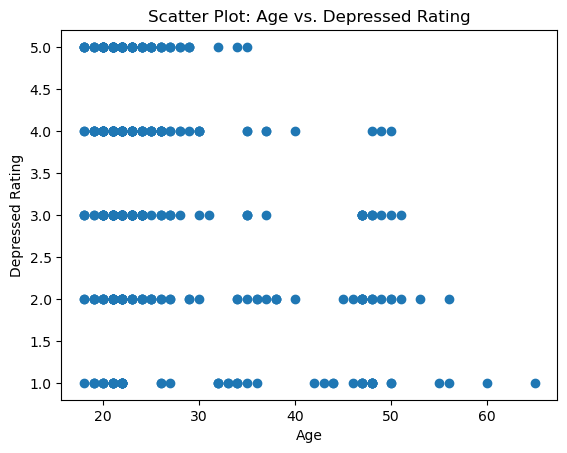

In [176]:
plt.scatter(merged_df['Age'], merged_df['Depressed_rating'])
plt.title("Scatter Plot: Age vs. Depressed Rating")
plt.xlabel("Age")
plt.ylabel("Depressed Rating")
plt.show()

Age_Group
15-30    3.522788
30-40    2.424242
40-50    2.000000
50-60    1.714286
60-70    1.000000
Name: Depressed_rating, dtype: float64


/var/folders/gw/g4f9j0rj55j7wlpd_183__qm0000gq/T/ipykernel_52045/4294963576.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = merged_df.groupby('Age_Group')['Depressed_rating'].mean()


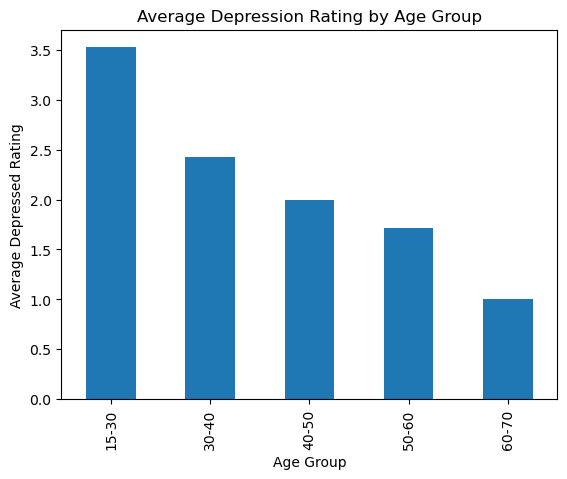

In [230]:
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=[15, 30, 40,50,60,70], labels=["15-30", "30-40","40-50","50-60","60-70"])
group_means = merged_df.groupby('Age_Group')['Depressed_rating'].mean()
print(group_means)

group_means.plot(kind='bar', title="Average Depression Rating by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Depressed Rating")
plt.show()

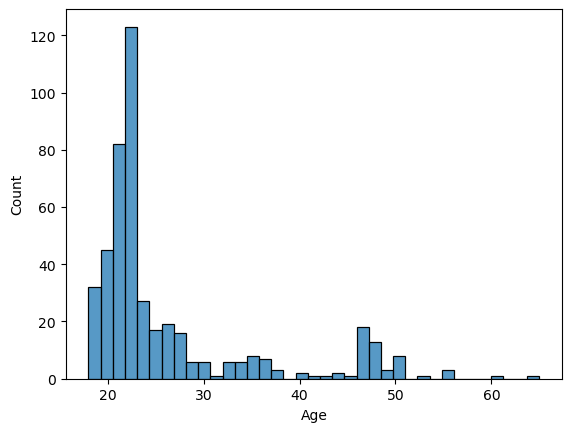

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(merged_df['Age'])
plt.show()

In [278]:
print(merged_df.columns)
merged_df.groupby('Gender')['Gender'].count()

Index(['Age', 'family_history', 'Timestamp', 'Gender', 'Relationship',
       'Occupation', 'Social_media_use', 'Social_media_type',
       'Social_media_usage', 'Restless', 'Distracted_rating',
       'Depressed_rating', 'Sleepless_rating', 'Trauma', 'Addiction_Risk',
       'Addiction_Class', 'Social_Isolation', 'Withdrawal_Symptoms',
       'Age_Group'],
      dtype='object')


Gender
Female    232
Male      222
Others      5
Name: Gender, dtype: int64

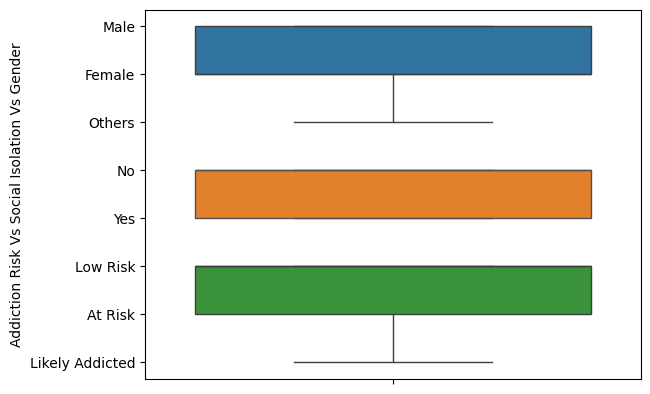

In [346]:
box = sns.boxplot(merged_df['Gender'])
box = sns.boxplot(merged_df['Social_Isolation'])
box = sns.boxplot(merged_df['Addiction_Risk'])
box.set(ylabel='Addiction Risk Vs Social Isolation Vs Gender')
plt.show()

In [284]:
correlation_matrix = merged_df.corr()
print(correlation_matrix)

ValueError: could not convert string to float: 'No'

In [286]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  459 non-null    int64   
 1   family_history       459 non-null    object  
 2   Timestamp            459 non-null    object  
 3   Gender               459 non-null    object  
 4   Relationship         459 non-null    object  
 5   Occupation           459 non-null    object  
 6   Social_media_use     459 non-null    object  
 7   Social_media_type    459 non-null    object  
 8   Social_media_usage   459 non-null    object  
 9   Restless             459 non-null    int64   
 10  Distracted_rating    459 non-null    int64   
 11  Depressed_rating     459 non-null    int64   
 12  Sleepless_rating     459 non-null    int64   
 13  Trauma               459 non-null    bool    
 14  Addiction_Risk       459 non-null    object  
 15  Addiction_Class      45